In [1]:
import sympy as sp
import numpy as np

from sympy.solvers.ode import dsolve

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
# Identificar y resolver la ecuación:
# 
# (3y + 7)dy + (2x + 1)dx = 0
# 
# y(0)=2
# 
# tanto de forma simbólica como de manera numérica. Representar ambas soluciones para comprobar las diferencias.

In [3]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

ec = y.diff(x) + (2*x+1)/(3*y+7)

print(ec)

(2*x + 1)/(3*y(x) + 7) + Derivative(y(x), x)


In [4]:
sol = dsolve(ec, y)
print(sol[0].rhs)
print(sol[1].rhs)

-sqrt(C1 - 6*x**2 - 6*x)/3 - 7/3
sqrt(C1 - 6*x**2 - 6*x)/3 - 7/3


In [5]:
sol = dsolve(ec, y, ics={y.subs(x,0):2})
print(sol.rhs)

sqrt(-6*x**2 - 6*x + 169)/3 - 7/3


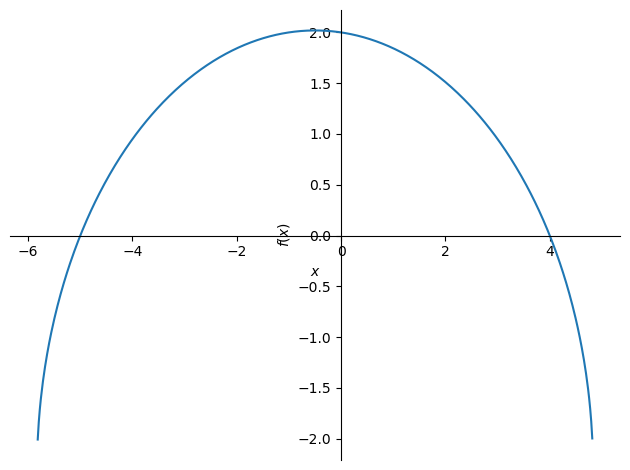

In [6]:
sp.plot(sol.rhs)

In [7]:
def eq(t, y):
    return [ - (2 * t + 1) / (3 * y[0] + 7) ]

def stop(t, y):
    return y[0] > -7/3

stop.direction = -1
stop.terminal = True

sol1 = solve_ivp(eq, [0, 8], [2], max_step=0.001, events=stop, dense_output=True)
sol2 = solve_ivp(eq, [0, -8], [2], max_step=0.001, events=stop, dense_output=True)

<function matplotlib.pyplot.show(close=None, block=None)>

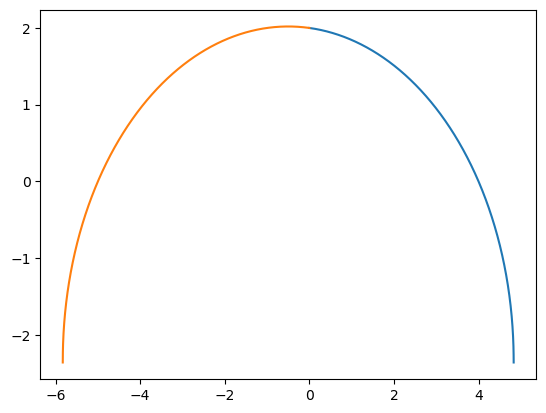

In [8]:
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.show


In [9]:
# Escribir una función que compruebe si dada la expresión de una ecuación, es o no exacta.

In [10]:
# En cálculo diferencial, una ecuación diferencial es exacta si puede
# expresarse como la derivada de una función potencial.
# M(x,y) dx + N(x,y) dy = 0 es exacta si: ∂𝑀/∂𝑦 = ∂𝑁/∂𝑥

In [11]:
from sympy import symbols, diff, simplify

def es_ecuacion_exacta(M, N, variables):
    """
    Comprueba si una ecuación diferencial es exacta.
    
    Args:
    - M: Función M(x, y) en la ecuación M dx + N dy = 0.
    - N: Función N(x, y) en la ecuación M dx + N dy = 0.
    - variables: Tupla con las variables simbólicas (x, y).
    
    Returns:
    - True si la ecuación es exacta, False en caso contrario.
    """
    x, y = variables
    
    # Calculamos las derivadas parciales
    dM_dy = diff(M, y)
    dN_dx = diff(N, x)
    
    # Comparamos las derivadas parciales
    return simplify(dM_dy - dN_dx) == 0


In [12]:
# Ejemplo de uso:
x, y = symbols('x y')
M = 2*x*y + 3
N = x**2 + 4*y

resultado = es_ecuacion_exacta(M, N, (x, y))
print(f"¿Es exacta la ecuación? {resultado}")

¿Es exacta la ecuación? True


In [13]:
from sympy import symbols, diff, simplify

def es_ecuacion_exacta(M, N, x, y):
    # Calculamos las derivadas parciales
    dM_dy = diff(M, y)
    dN_dx = diff(N, x)
    
    # Comparamos las derivadas parciales
    return simplify(dM_dy - dN_dx) == 0

x, y = symbols('x y')
M = 2*x*y + 3
N = x**2 + 4*y

resultado = es_ecuacion_exacta(M, N, x, y)
print(f"¿Es exacta la ecuación? {resultado}")

¿Es exacta la ecuación? True


In [14]:
# Identificar y resolver la ecuación:
# (2 * x**2 * y + 4) * dx − (3 − 2 * x * y**2) * dy = 0
# y(1)=1

In [15]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

ec = y.diff(x) - ( 2 * x**2 + 4 ) / ( 3 - 2 * x * y**2 )

print(ec)

-(2*x**2 + 4)/(-2*x*y(x)**2 + 3) + Derivative(y(x), x)


In [16]:
#sol = dsolve(ec, y, ics={y.subs(x,1):1})
#print(sol.rhs)

In [17]:
# Resolver buscando soluciones implícitas
#sol = dsolve(ec, y, simplify=False)
#print(sol)

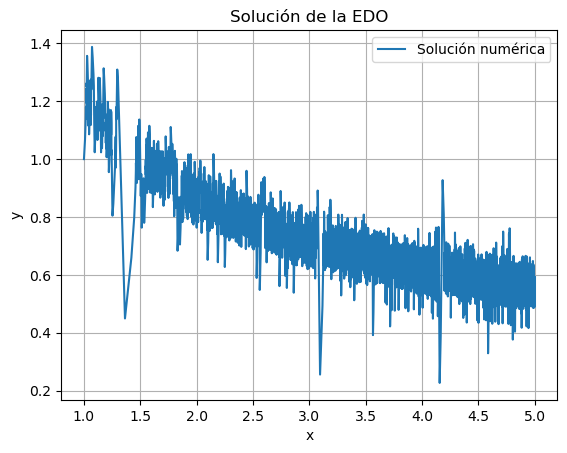

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la ecuación diferencial
def f(t, y):
    return (2 * t**2 + 4) / (3 - 2 * t * y**2)

# Condiciones iniciales
x0, y0 = 1, 1
x_span = (x0, 5)  # Intervalo de integración

# Resolver numéricamente
sol = solve_ivp(f, x_span, [y0], dense_output=True)

# Graficar la solución
plt.plot(sol.t, sol.y[0], label='Solución numérica')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la EDO')
plt.legend()
plt.grid()
plt.show()
